In [7]:
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.applications import efficientnet_v2

In [13]:
# Need to make a model for classifying different emotion and convert the model in to tflite

model = keras.Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=7, activation='softmax'))






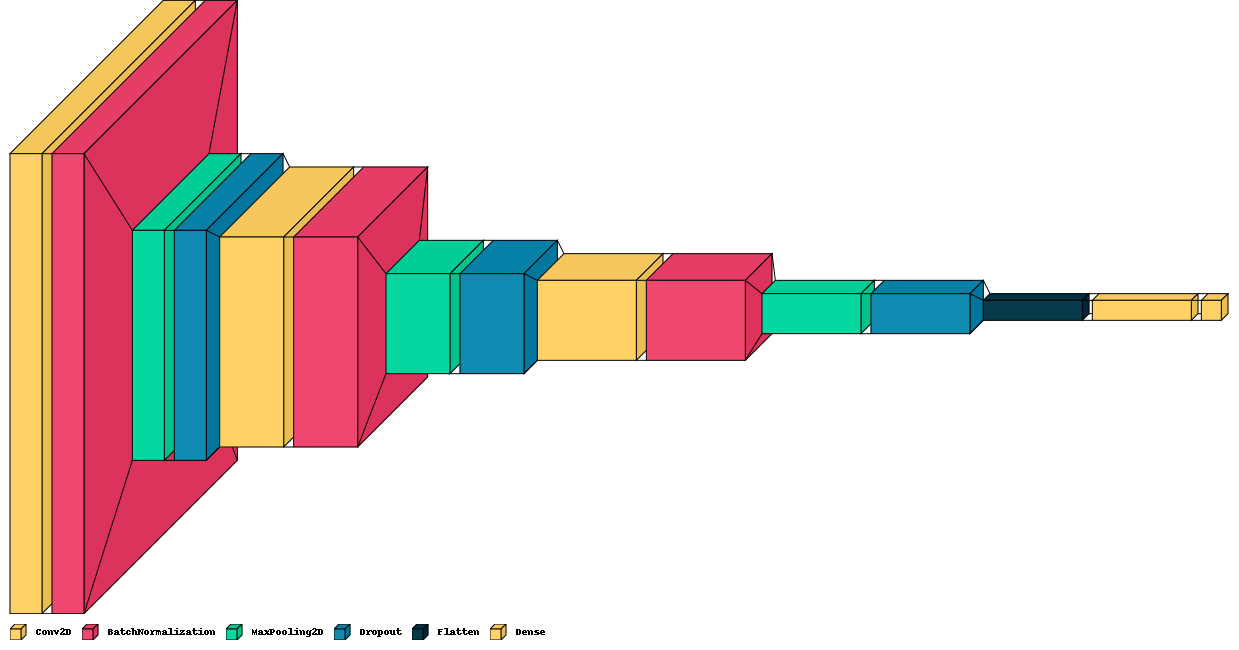

In [16]:
# model.summary()

import visualkeras

visualkeras.layered_view(model, legend=True, scale_xy=10, scale_z=1, max_z=99)

In [21]:
# Writing some functions to Augment and preprocess the data

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)


batch_size = 32
image_size = (48,48)


In [23]:
train_data = train_datagen.flow_from_directory(
    directory='emotion-detection-fer/train/',
    target_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True,
)

validation_data = validation_datagen.flow_from_directory(
    directory='emotion-detection-fer/test/',
    target_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [25]:
# fit the model from Batch Dataset of tensorflow
history = model.fit(train_data, validation_data=validation_data, epochs=50, verbose=1)

NameError: name 'scipy' is not defined

InvalidArgumentError: {{function_node __wrapped__SaveDataset_Tshard_func_args_0_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty.
	 [[{{node decode_image/DecodeImage}}]] [Op:SaveDataset]